In [1]:
import cv2
import numpy as np
import imutils
import math
from typing import Tuple, Union
# from deskew import determine_skew
from pytesseract import*
import tensorflow as tf
from tensorflow import keras
import glob
import random
import string
import os
import matplotlib.pyplot as plt
from keras.models import model_from_json
from sklearn import neighbors,metrics
import argparse
import timeit

### Create list from A to Z

In [2]:
ch_list=[]
for i in range(65,91):
    ch_list.append(chr(i))

### Simple NN Model

In [3]:
def get_data(path, num_class):
    count=[]
     
    for ff in os.listdir(path):
        new_path=os.path.join(path, ff)
        count.append(len([f for f in os.listdir(new_path)if os.path.isfile(os.path.join(new_path, f))]))

    y=np.array(sum([[i]*count[i] for i in range(num_class)],[]))

    folders = glob.glob(path + '*')
    imagenames_list = [f for folder in folders for f in glob.glob(folder+'/*.jpg')]

    read_images = np.array([cv2.imread(image, cv2.IMREAD_GRAYSCALE) for image in imagenames_list])        
    
    x = np.array([cv2.bitwise_not(cv2.resize(i,(28,28))) for i in read_images])/255
    
    return x, y

In [4]:
import seaborn as sn
from sklearn.metrics import accuracy_score

def getHeatMap(y_test, y_pred):
    
    print('Accuray Score: ',accuracy_score(y_test, y_pred))
    cm=tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

    plt.figure(figsize=(20,20))
    sn.heatmap(cm,annot=True,fmt='d')
    plt.xlabel('Predictions')
    plt.ylabel('Truth')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
9/9 [==============================] - 0s 2ms/step - loss: 1.7687 - accuracy: 0.3970
Epoch 2/5
9/9 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.8502
Epoch 3/5
9/9 [==============================] - 0s 1ms/step - loss: 0.2893 - accuracy: 0.9625
Epoch 4/5
9/9 [===========

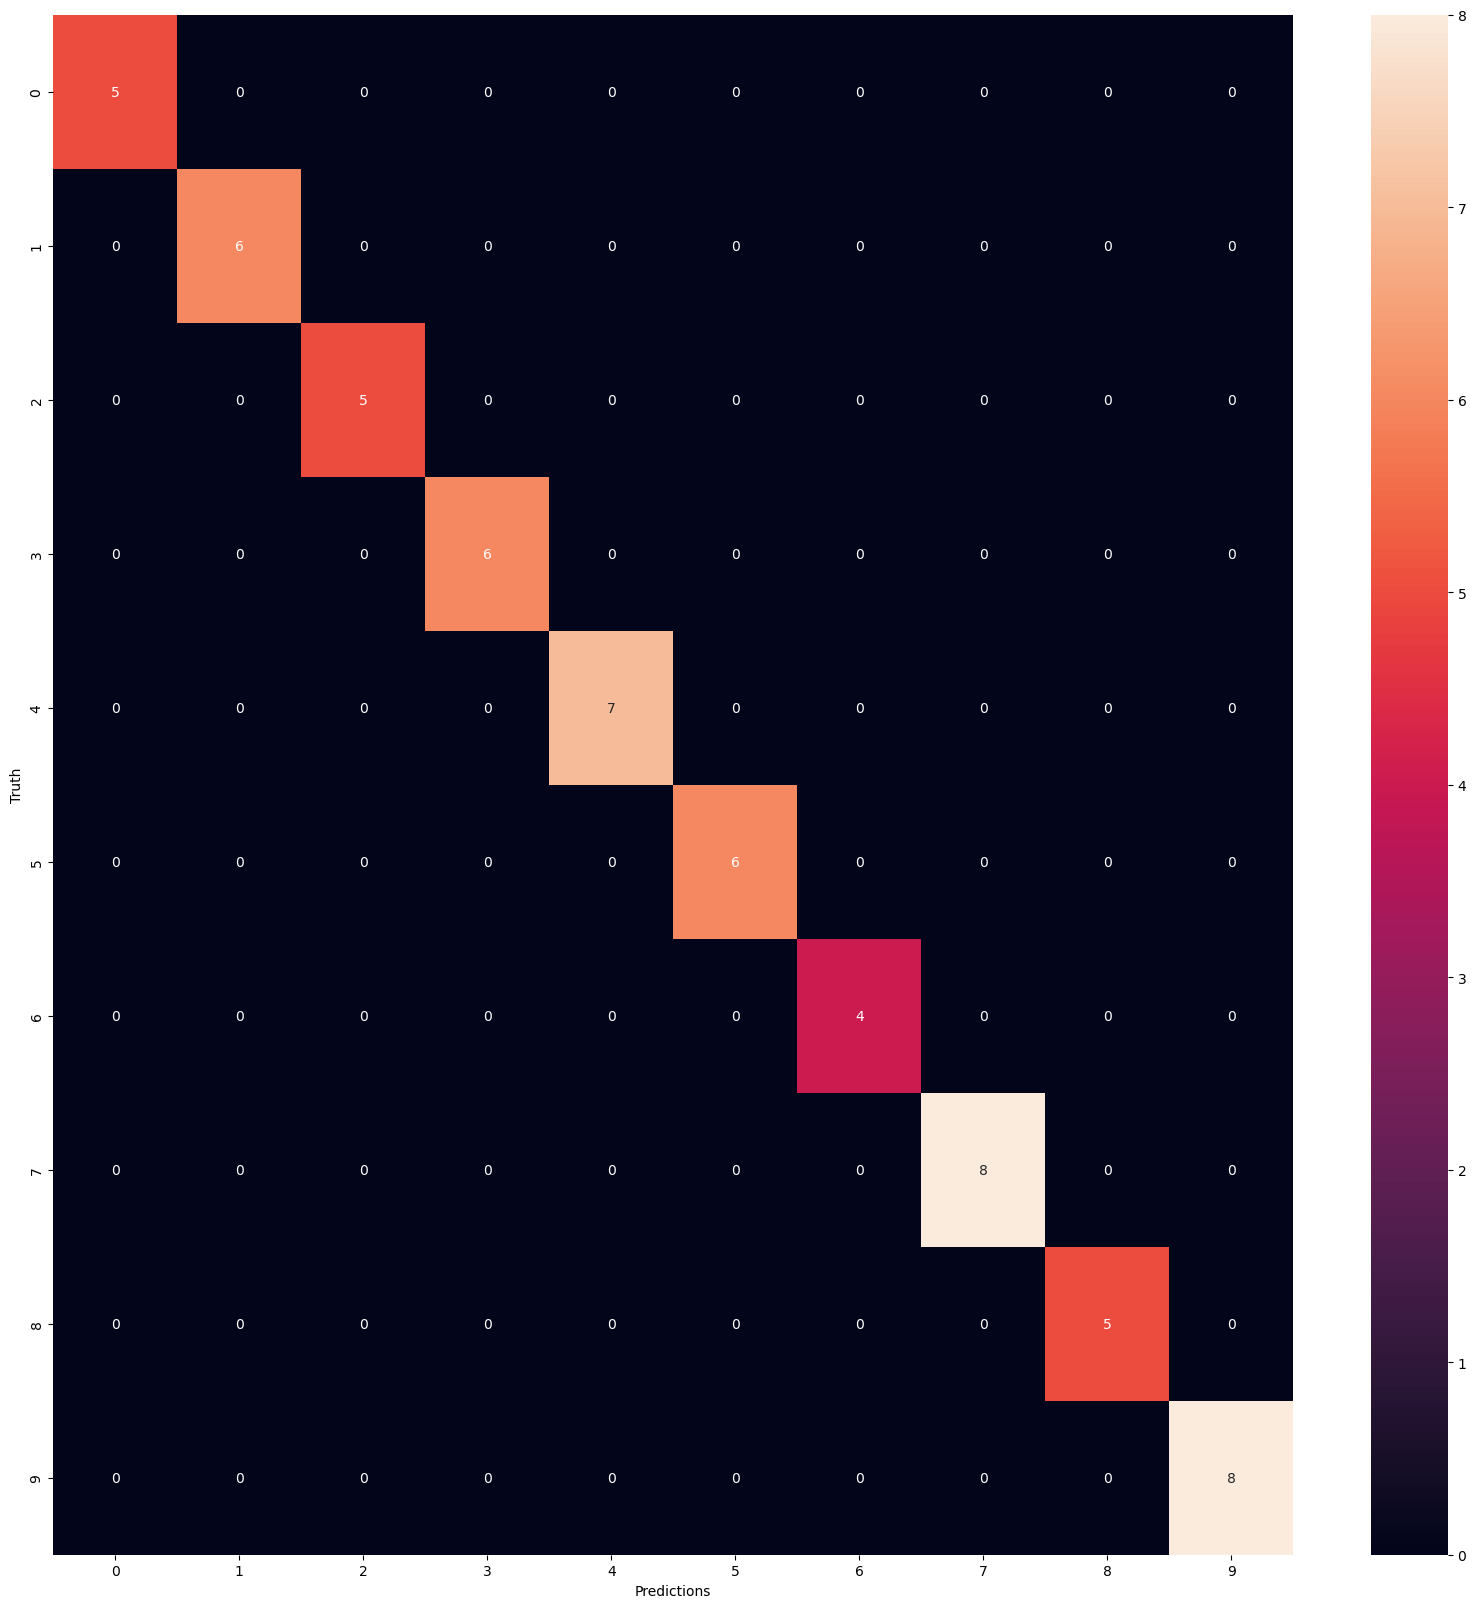

In [5]:
x_train, y_train = get_data('./dataset/Training Data/digits/', num_class=10)

## Train Model
# Calculate Training Time
start = timeit.default_timer()
## Train Model
num_model=keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

num_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
print(num_model.summary())
num_model.fit(x_train, y_train,epochs=5)

stop = timeit.default_timer()

print('Time: ', stop - start)

#Testing
x_test, y_test = get_data('./dataset/Testing Data/digits/',num_class= 10)

predict=num_model.predict(x_test)
y_pred=[np.argmax(i) for i in predict]

getHeatMap(y_test, y_pred)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 26)                2626      
                                                                 
Total params: 81,126
Trainable params: 81,126
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
25/25 [==============================] - 0s 2ms/step - loss: 2.5072 - accuracy: 0.3398
Epoch 2/5
25/25 [==============================] - 0s 2ms/step - loss: 0.9792 - accuracy: 0.8224
Epoch 3/5
25/25 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.9318
Epoch 4/5
25/25 [=

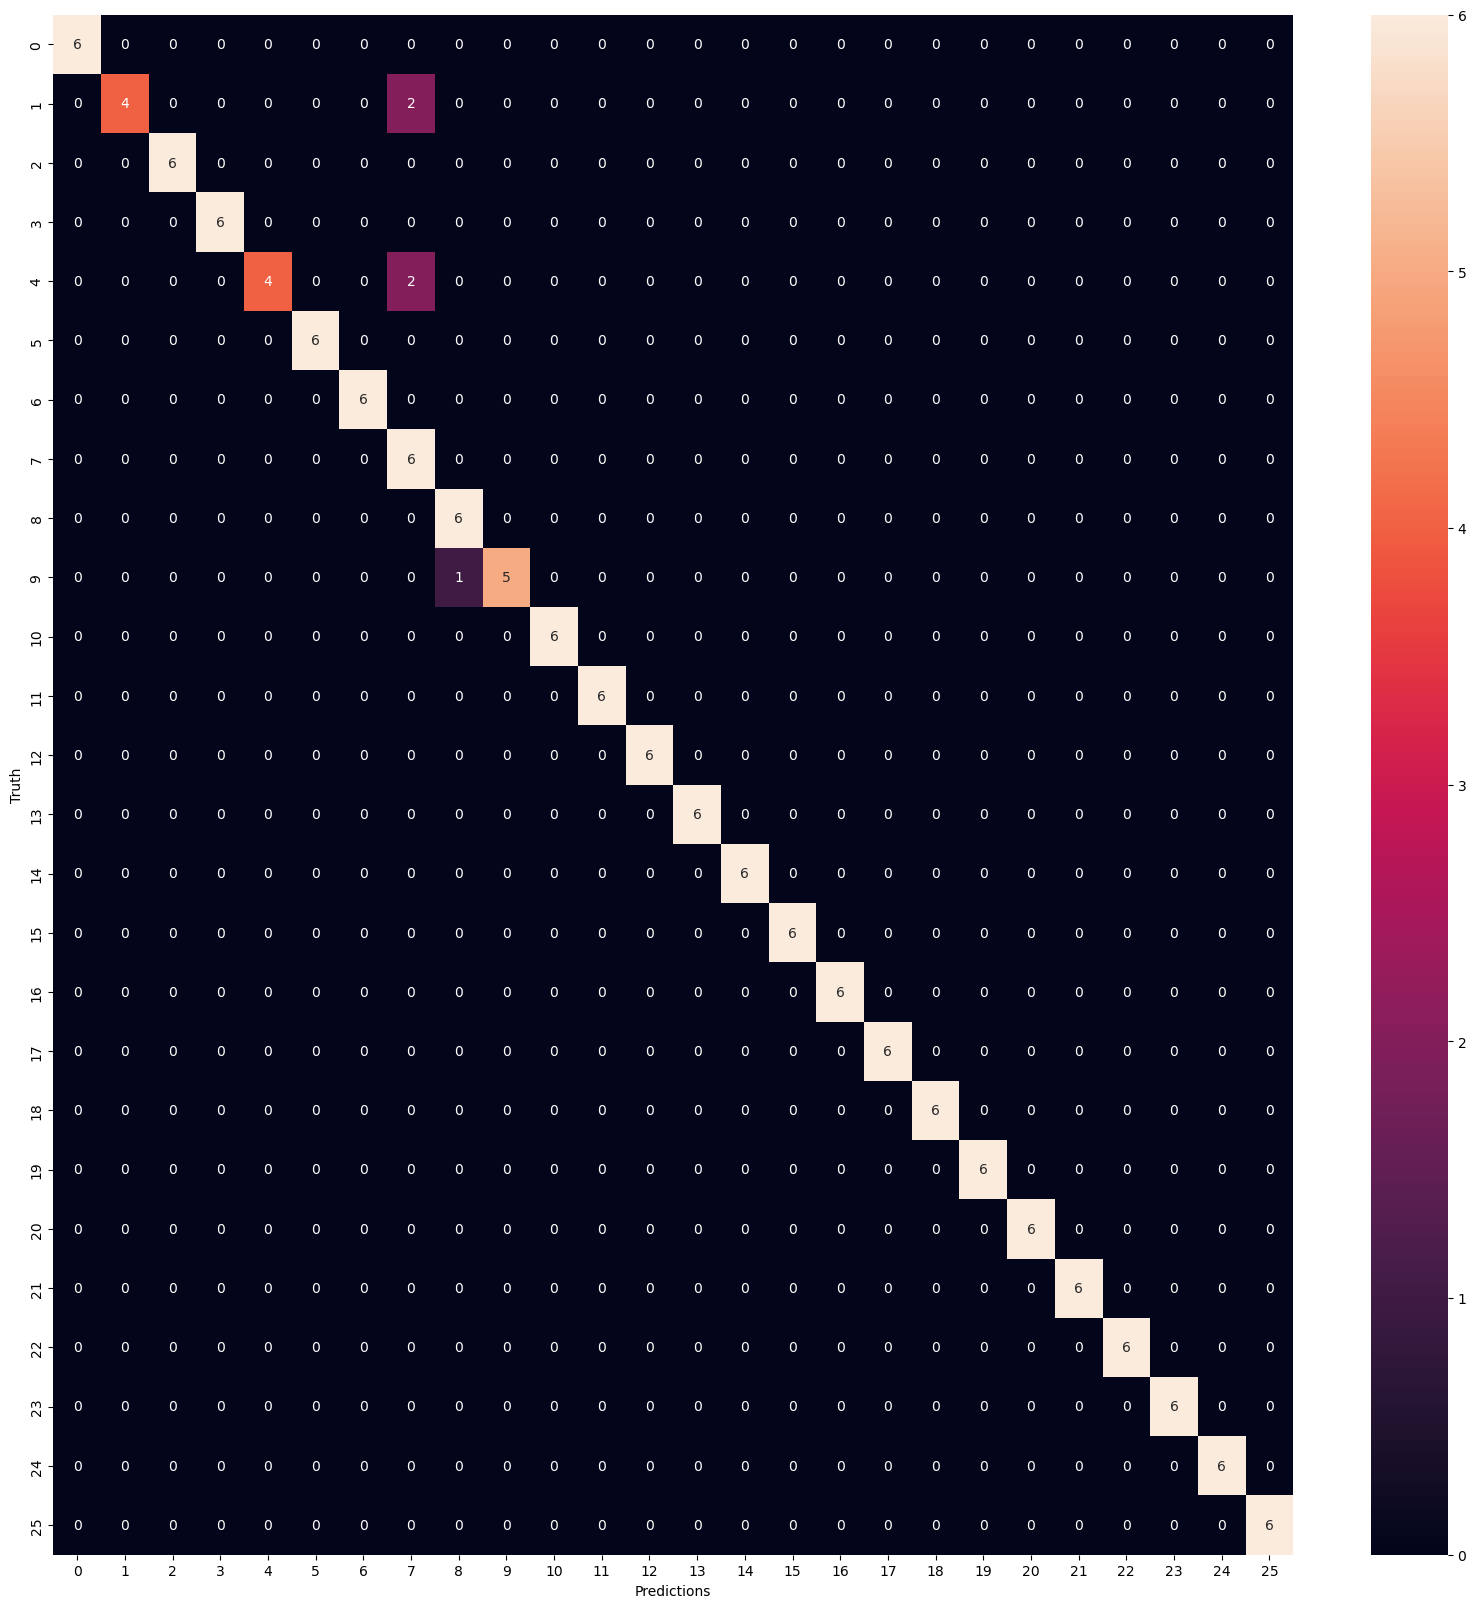

In [6]:
x_train, y_train = get_data('./dataset/Training Data/char/', num_class=26)

## Train Model
ch_model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(26,activation='sigmoid')
])

ch_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print(ch_model.summary())
# Calculate Training Time
start = timeit.default_timer()

ch_model.fit(x_train, y_train,epochs=5)

stop = timeit.default_timer()

print('Time: ', stop - start)

#Testing
x_test, y_test = get_data('./dataset/Testing Data/char/',num_class= 26)

predict=ch_model.predict(x_test)
y_pred=[np.argmax(i) for i in predict]

getHeatMap(y_test, y_pred)

### Load CNN Model

In [7]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                             

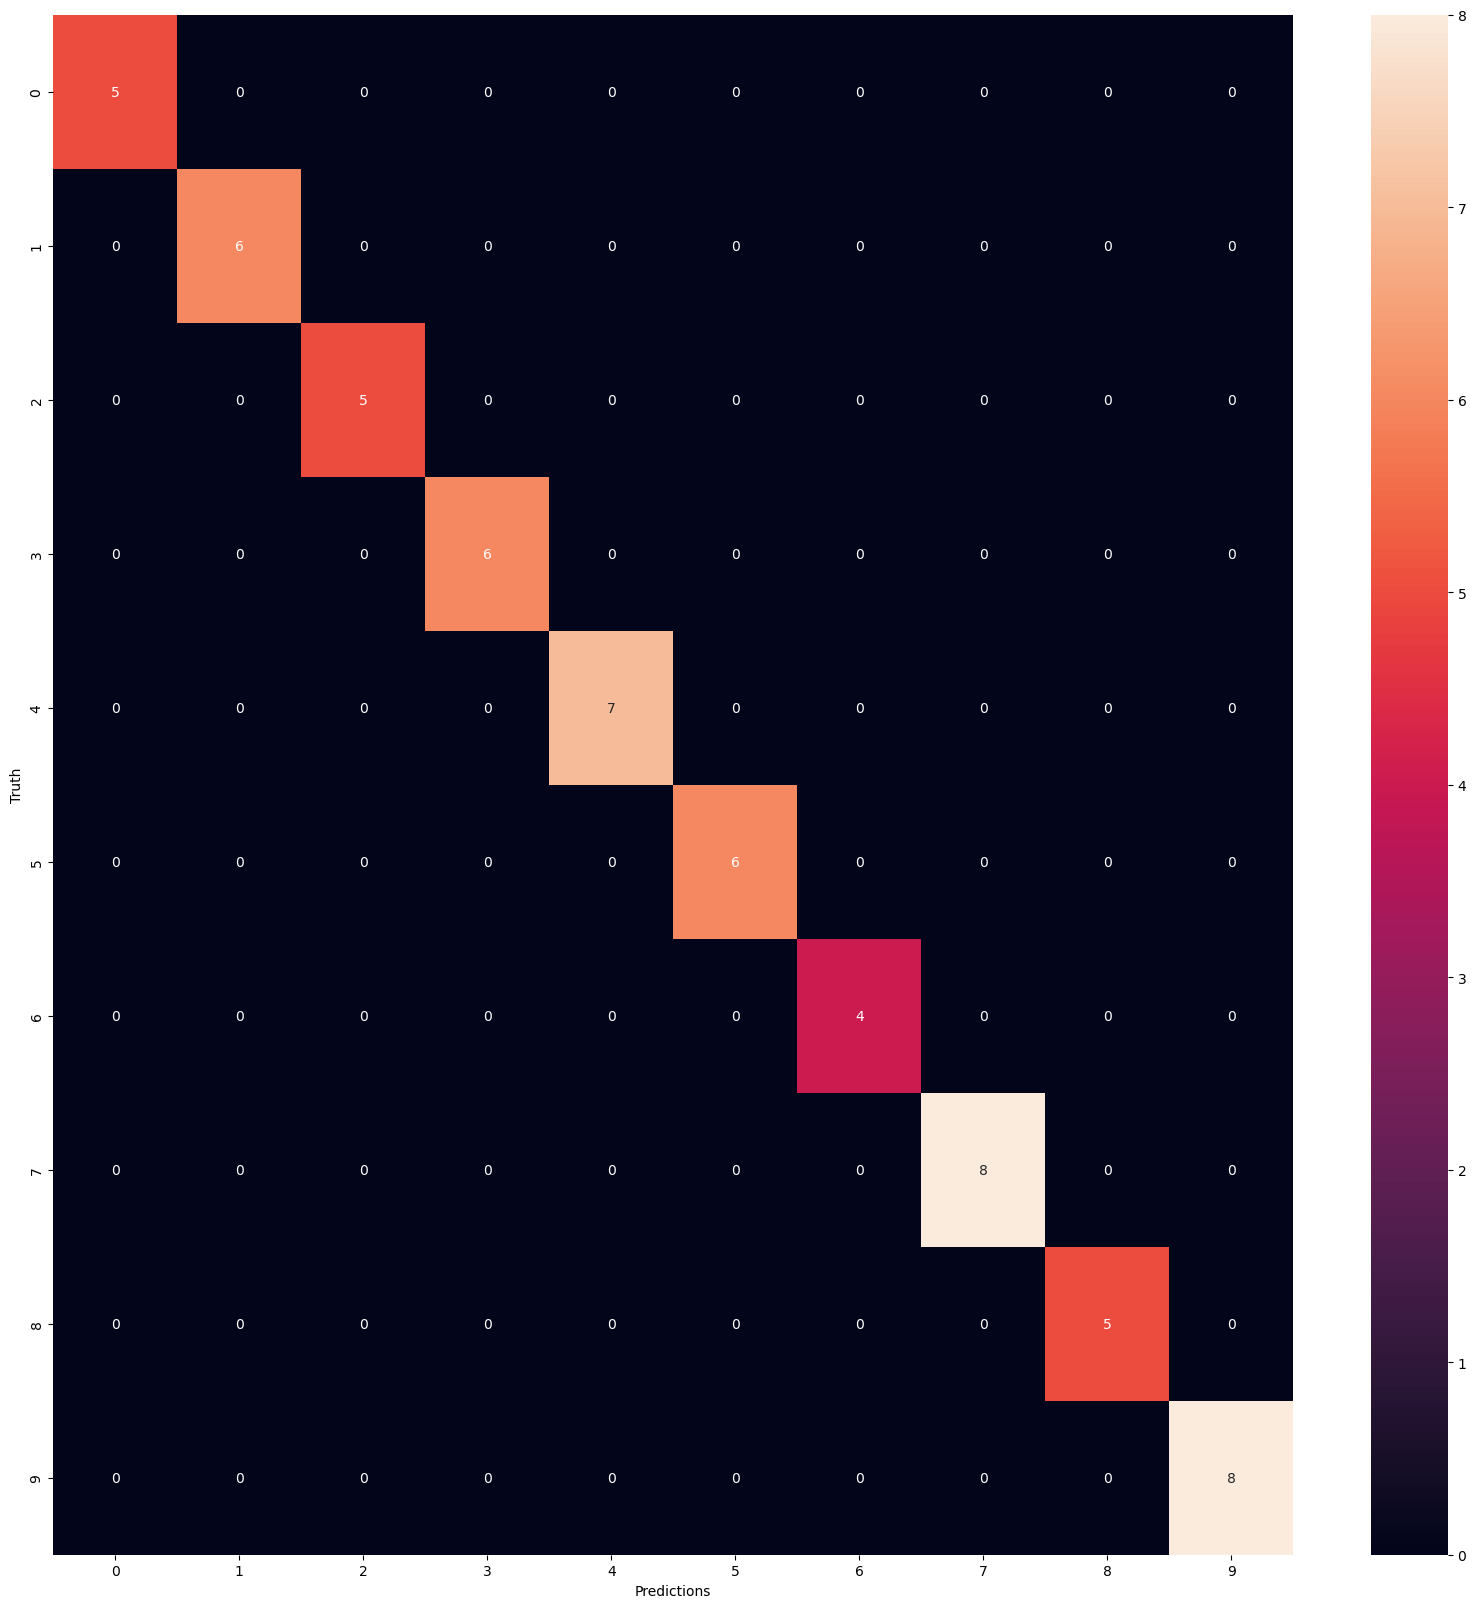

In [8]:
x_train, y_train = get_data('./dataset/Training Data/digits/', num_class=10)
x_test, y_test = get_data('./dataset/Testing Data/digits/',num_class= 10)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

inpx = Input(shape=(28, 28, 1))
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='sigmoid')(layer6)

cnn_num_model = Model([inpx], layer7)

cnn_num_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print(cnn_num_model.summary())
cnn_num_model.fit(x_train, y_train, epochs=5, batch_size=10)

predict=cnn_num_model.predict(x_test)
y_pred=[np.argmax(i) for i in predict]

getHeatMap(y_test, y_pred)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_3 (Flatten)         (None, 4096)              0         
                                                           

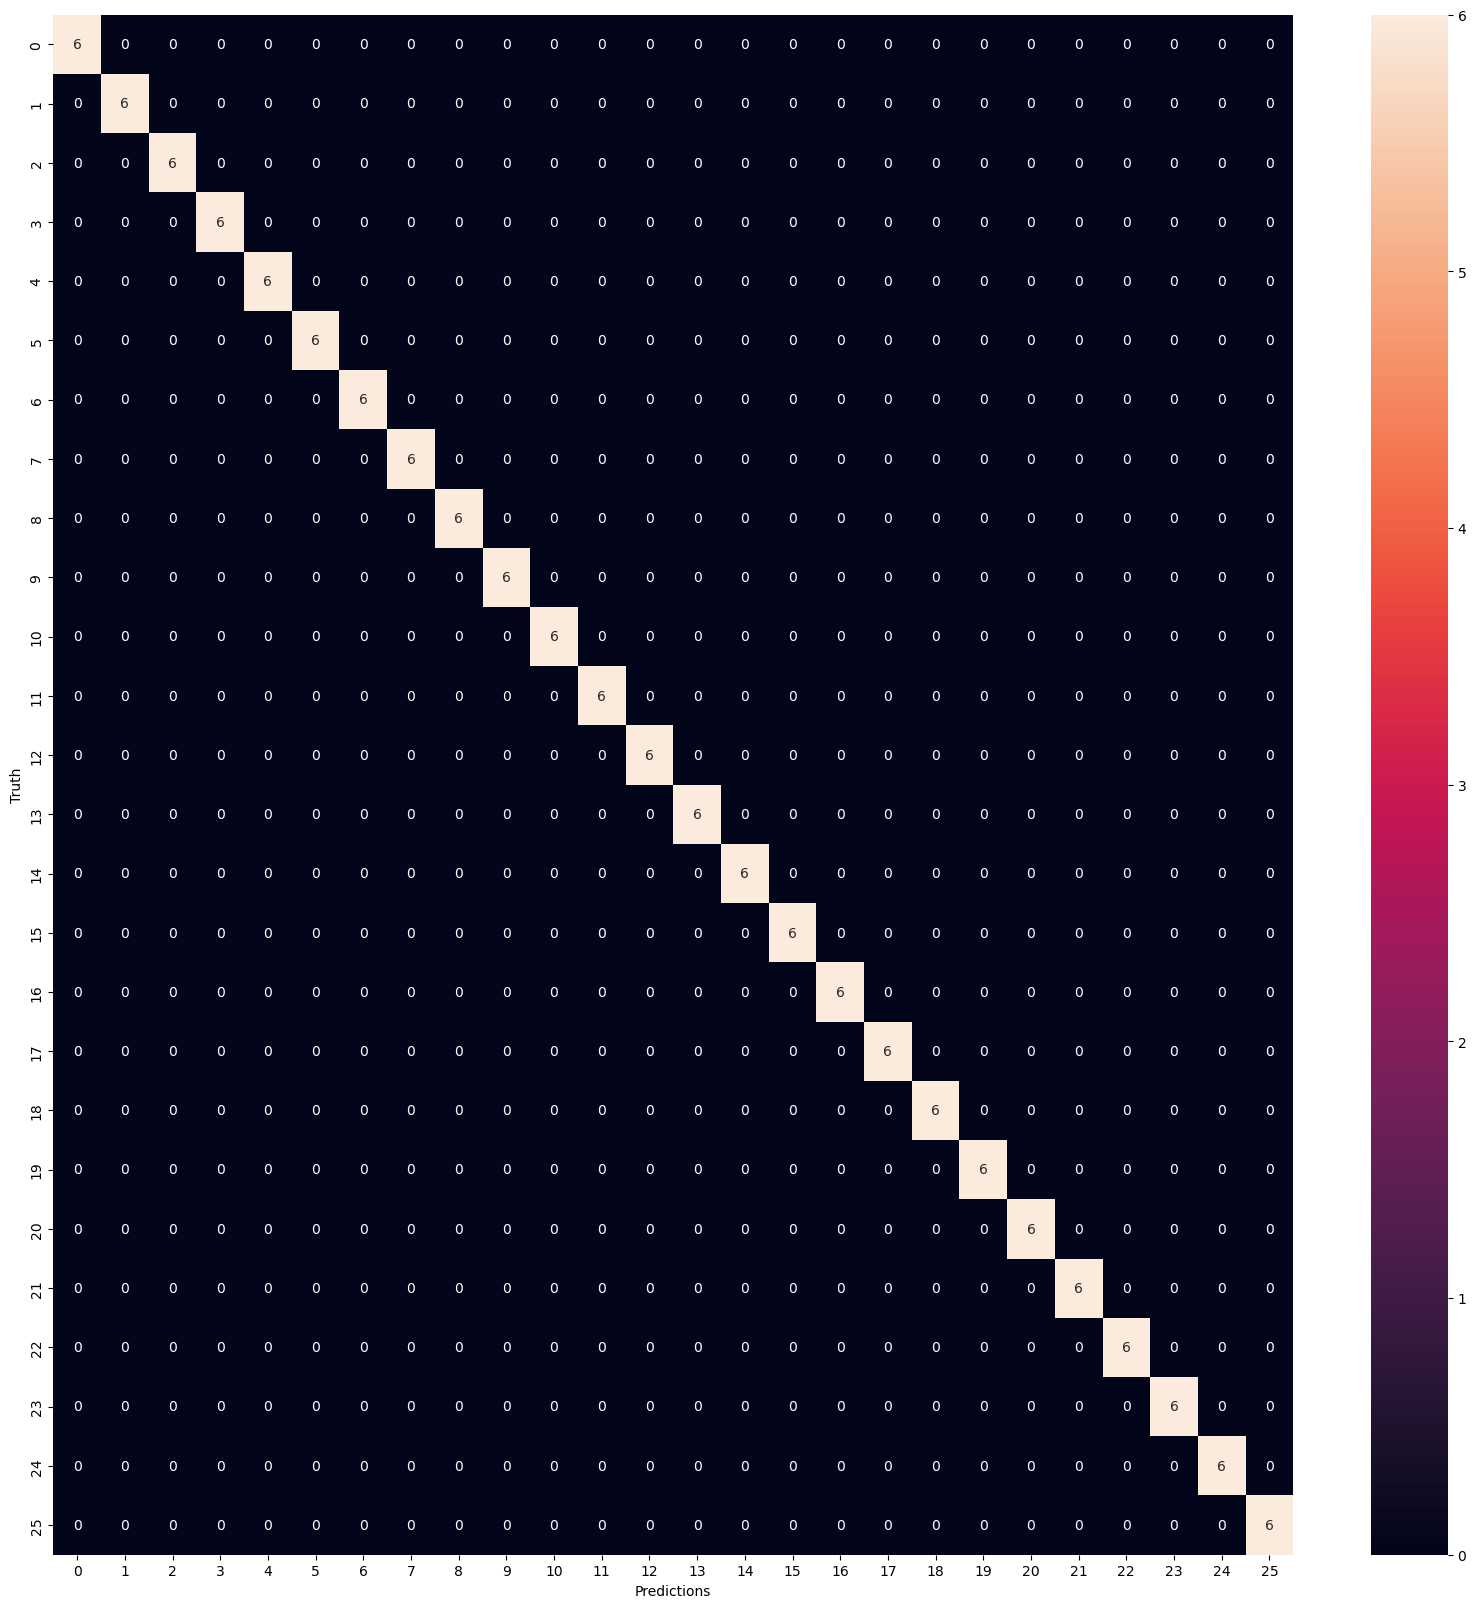

In [9]:
x_train, y_train = get_data('./dataset/Training Data/char/', num_class=26)
x_test, y_test = get_data('./dataset/Testing Data/char/',num_class= 26)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

inpx = Input(shape=(28, 28, 1))
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(26, activation='softmax')(layer6)

cnn_ch_model = Model([inpx], layer7)

cnn_ch_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print(cnn_ch_model.summary())
cnn_ch_model.fit(x_train, y_train, epochs=5, batch_size=10)

predict=cnn_ch_model.predict(x_test)
y_pred=[np.argmax(i) for i in predict]

getHeatMap(y_test, y_pred)

## KNN Model

Time:  0.000655699999995818
Accuray Score:  1.0


C:\Users\gujar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


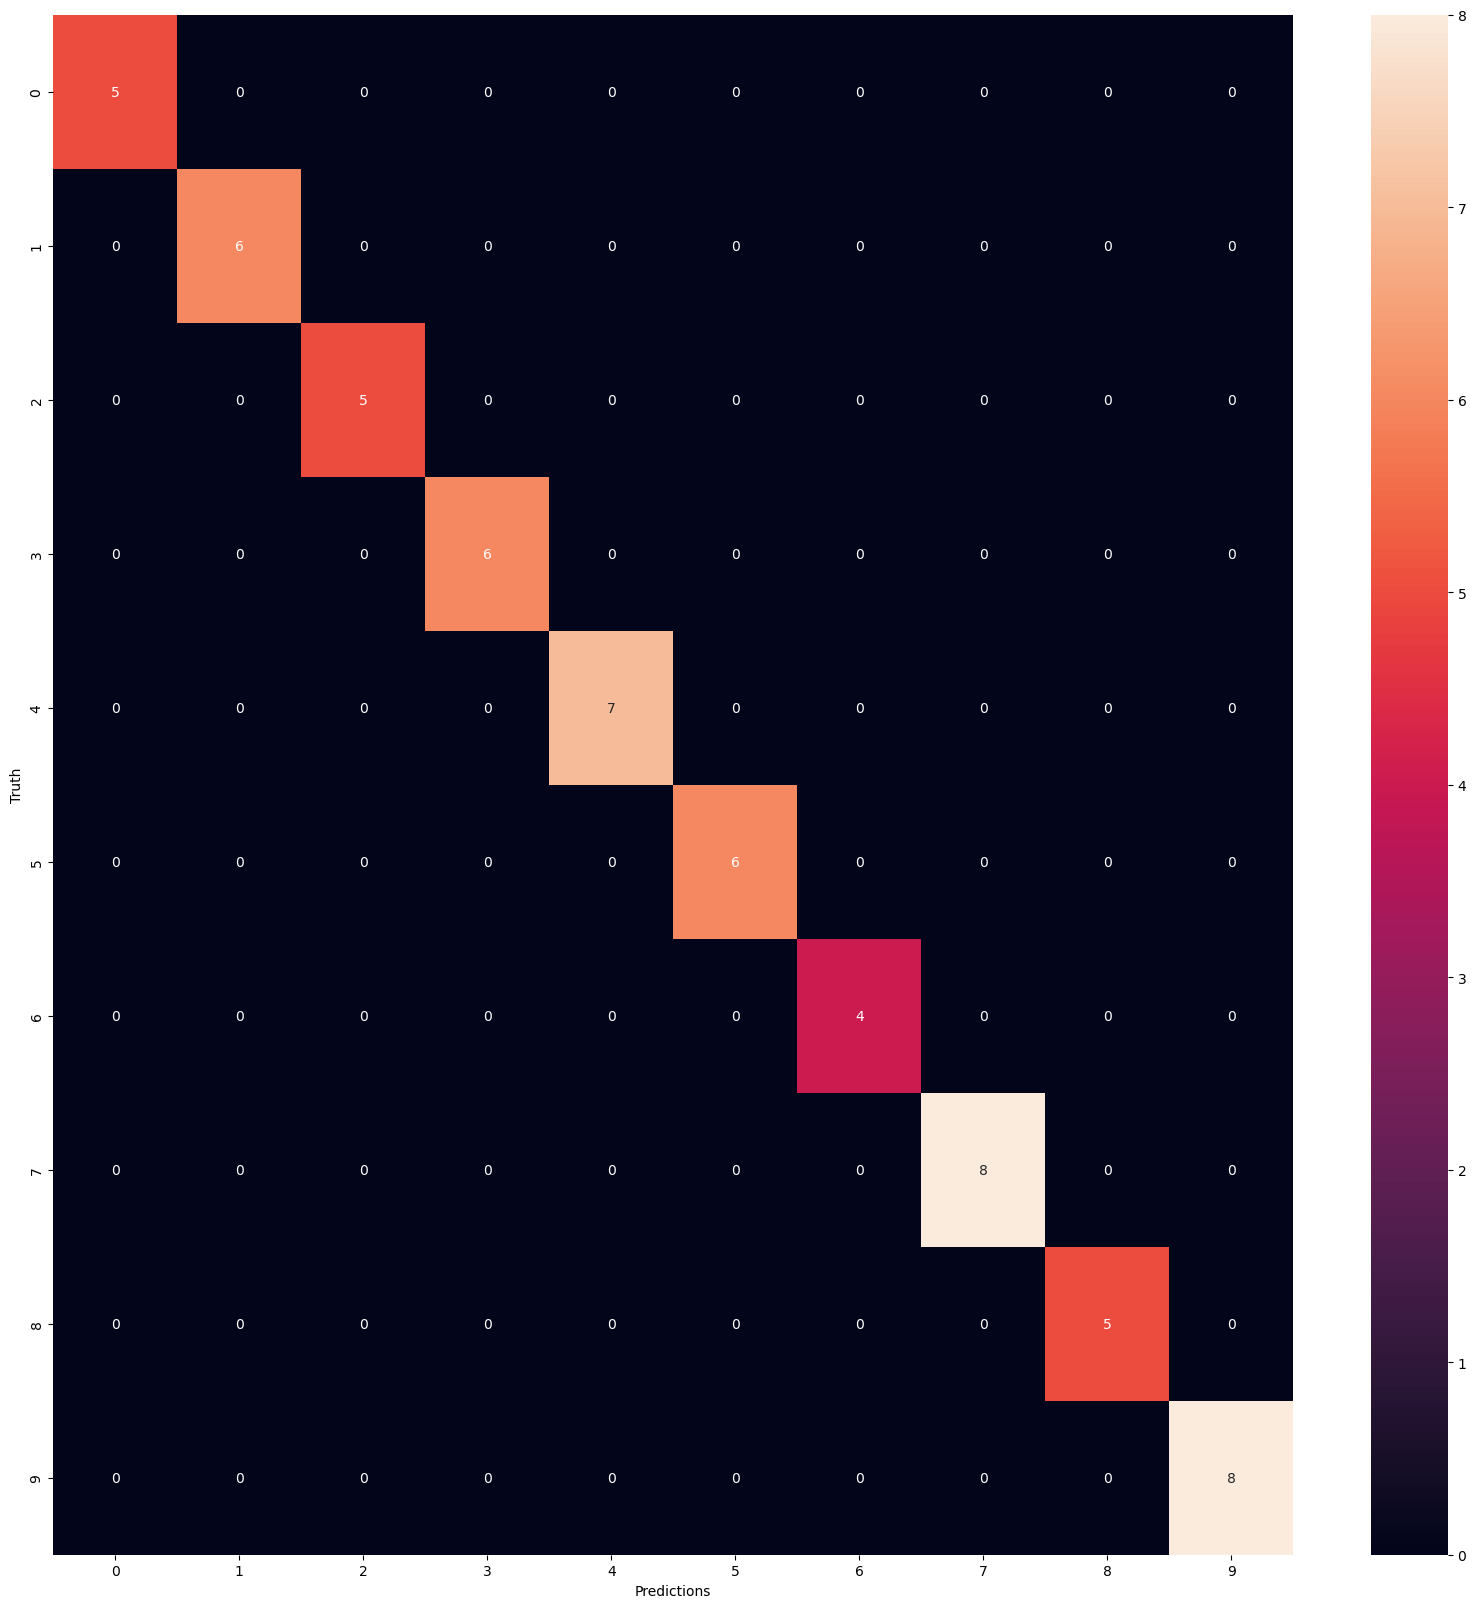

In [10]:
# Calculate Training Time
x_train, y_train = get_data('./dataset/Training Data/digits/', num_class=10)
x_test, y_test = get_data('./dataset/Testing Data/digits/',num_class= 10)

x_train = np.reshape(x_train,(x_train.shape[0],-1))
x_test = np.reshape(x_test,(x_test.shape[0],-1))

start = timeit.default_timer()

num_knn=neighbors.KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

stop = timeit.default_timer()

print('Time: ', stop - start)

y_pred = num_knn.predict(x_test)
getHeatMap(y_test, y_pred)

In [11]:
### For Characters
count_ch=[]
path ='./dataset/Training Data/char/'
for ff in os.listdir(path):
    new_path=os.path.join(path, ff)
    count_ch.append(len([f for f in os.listdir(new_path)if os.path.isfile(os.path.join(new_path, f))]))
ch_test=[]

for i in range(26):
    lst1=[i]*count_ch[i]
    ch_test+=lst1
train_label=np.array(ch_test)

folders = glob.glob('./dataset/Training Data/char/*')
imagenames_list = []
for folder in folders:
    for f in glob.glob(folder+'/*.jpg'):
        imagenames_list.append(f)

read_images = []        
for image in imagenames_list:
    read_images.append(cv2.imread(image, cv2.IMREAD_GRAYSCALE))
    
img_train=[]
for i in read_images:
    img_train.append(cv2.bitwise_not(cv2.resize(i,(28,28))))
img_train=np.array(img_train)
img_train=np.reshape(img_train,(img_train.shape[0],28*28))
train_data=img_train/255

Time:  0.0012359999999986826
Accuray Score:  0.9807692307692307


C:\Users\gujar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


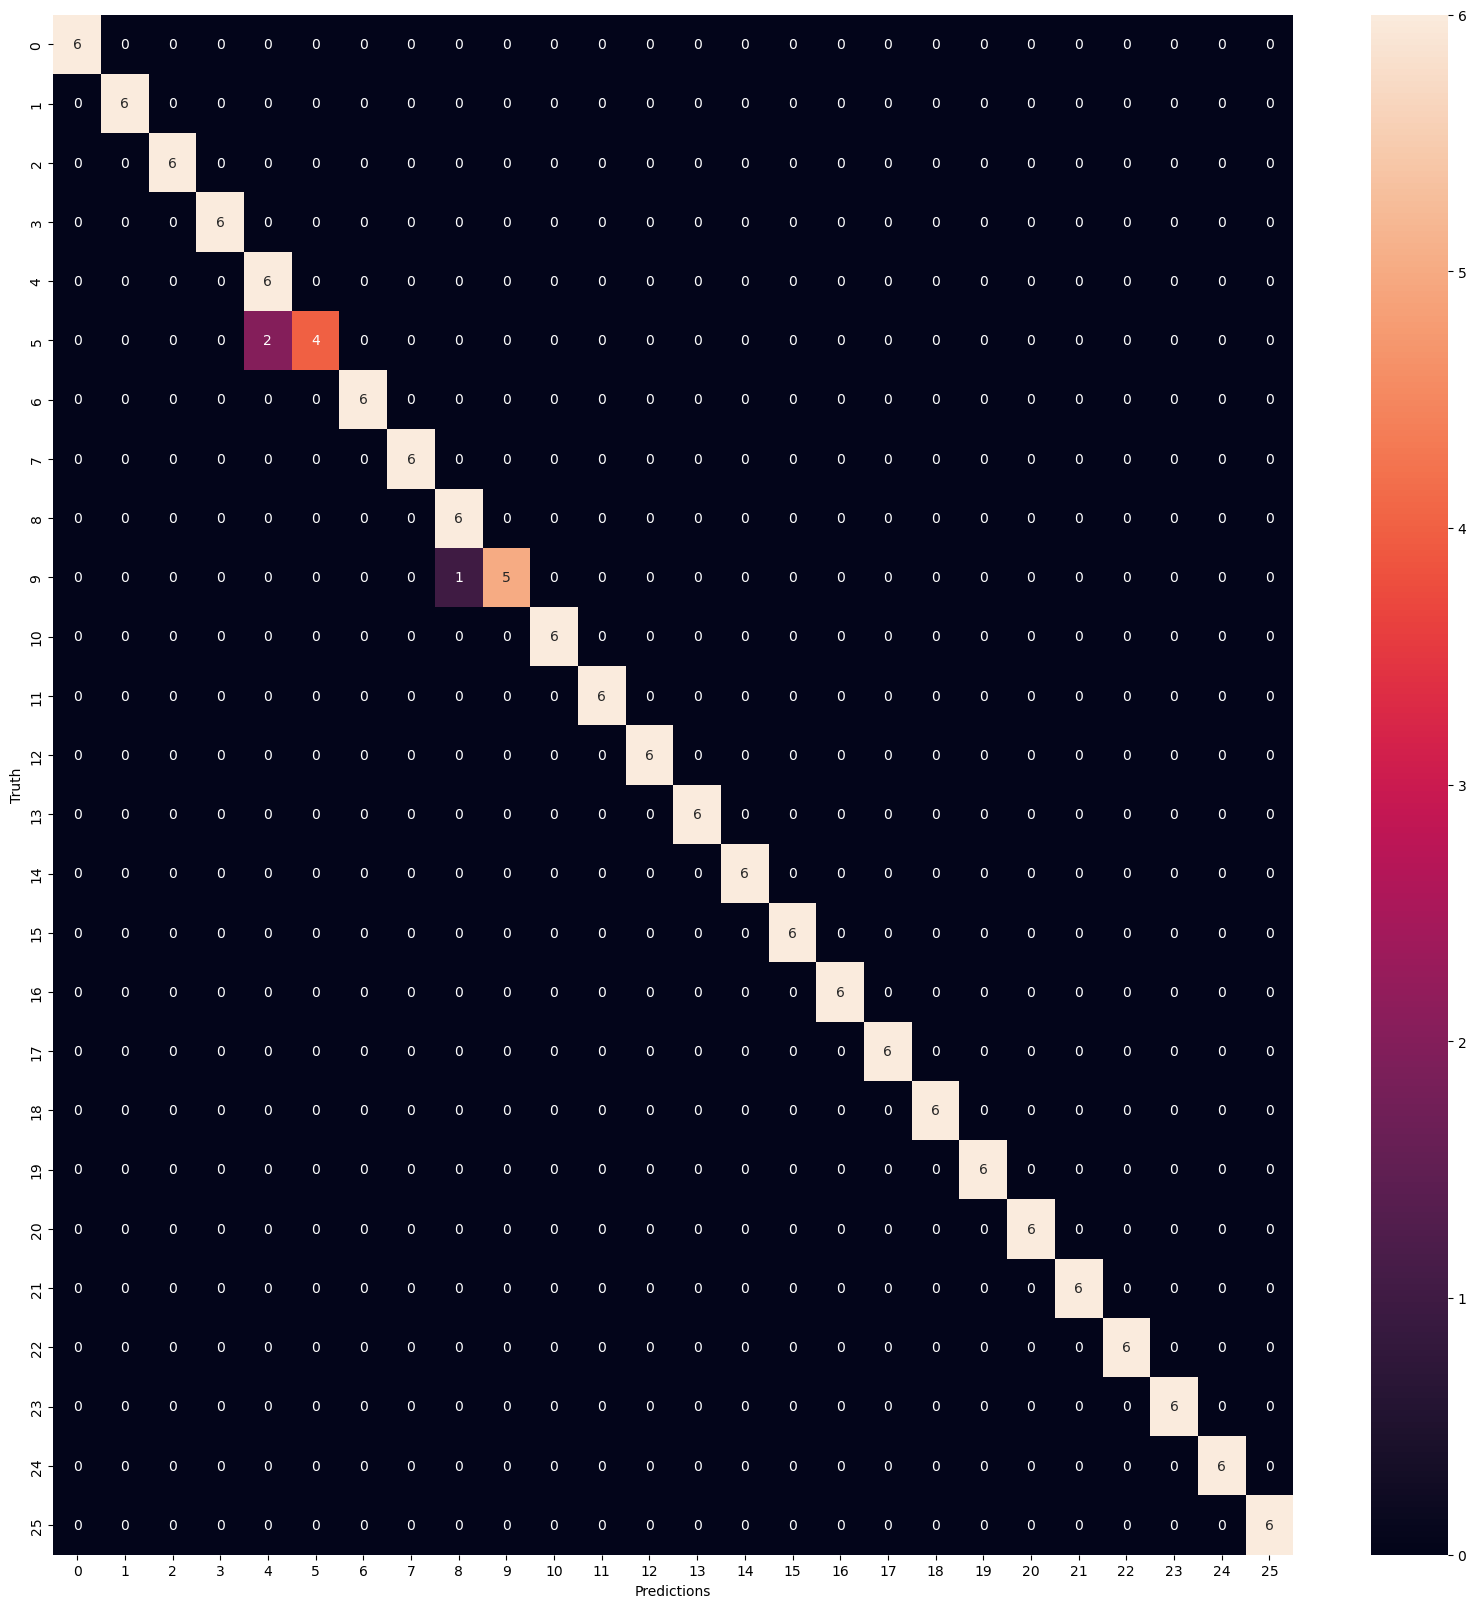

In [12]:
# Calculate Training Time
x_train, y_train = get_data('./dataset/Training Data/char/', num_class=26)
x_test, y_test = get_data('./dataset/Testing Data/char/',num_class= 26)

x_train = np.reshape(x_train,(x_train.shape[0],-1))
x_test = np.reshape(x_test,(x_test.shape[0],-1))

start = timeit.default_timer()

ch_knn=neighbors.KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

stop = timeit.default_timer()

print('Time: ', stop - start)

y_pred = ch_knn.predict(x_test)
getHeatMap(y_test, y_pred)

### Functions used in program

In [13]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

###  [Valid Box](#BB-and-extraction)

In [14]:
def valid_bbox(image):
    image=cv2.resize(image,(500,120))
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # resize image to three times as large as original for better readability
    gray = cv2.resize(gray, None, fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC)
    print("Gray image")
    plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # perform gaussian blur to smoothen image
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    print(" Gaussian blur to smoothen image")
    plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # threshold the image using Otsus method to preprocess for tesseract
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    print("Otsu Threshold")
    plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
    plt.show()
    
 
    #Perform Teserract OCR on thresold image
    try:
        text = pytesseract.image_to_string(thresh)
        
    except: 
        text = None
    
    # create rectangular kernel for dilation
    rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
    
    # apply dilation to make regions more clear
    dilation = cv2.dilate(thresh, rect_kern, iterations = 1)
    print("Dilated image")
    plt.imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))
    plt.show()
    
    # find contours of regions of interest within license plate
    try:
        contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    except:
        ret_img, contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
    # sort contours left-to-right
    sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])
    
    # create copy of gray image
    im2 = gray.copy()
    
    # loop through contours and find individual letters and numbers in license plate
    valid=[]
    
    for cnt in sorted_contours:
        x,y,w,h = cv2.boundingRect(cnt)
        height, width = im2.shape
        # if height of box is not tall enough relative to total height then skip
        if height / float(h) > 6: continue

        ratio = h / float(w)
        # if height to width ratio is less than 1.5 skip
        if ratio < 1.5: continue

        # if width is not wide enough relative to total width then skip
        if width / float(w) > 35: continue

        area = h * w
        # if area is less than 8000 or larger than 25000 pixels skip
        if area > 25000 and area < 8000: continue

        valid.append([x,y,w,h])
    return valid,im2,thresh,text

In [15]:
def bounding_box(crop):
    
    valid_bb,gray_img,thresh,text=valid_bbox(crop)
    valid2=[]
    
    for i in range(len(valid_bb)):
        flag=1
        x,y,w,h=valid_bb[i]
        for j in range(len(valid_bb)):
            if(j!=i and flag):
                x1,y1,w1,h1=valid_bb[j]
                if(x > x1 and x< x1 + w1):
                    flag=0
        if flag:
            valid2.append(valid_bb[i])

    valid_char=[]
    for box in valid2:
        x,y,w,h = box
        # draw the rectangle
        rect = cv2.rectangle(gray_img, (x,y), (x+w, y+h), (0,255,0),2)
        # grab character region of image
        roi = thresh[y:y+h, x:x+w]
#         roi = thresh[y-5:y+h+5, x-5:x+w+5]

        # perfrom bitwise not to flip image to black text on white background
        roi = cv2.bitwise_not(roi)
        # perform another blur on character region
        roi = cv2.medianBlur(roi, 5)
#         text = pytesseract.image_to_string(roi)
    #     print(text)
        valid_char.append(cv2.resize(roi,(28,28)))
    plt.figure(figsize=(20,20))
    plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))
    plt.show()
    extract_char=valid_char.copy()
    valid_char=np.array(valid_char)
    valid_char=valid_char/255
    
    return valid_char, extract_char,text

### Extraction charachter

In [16]:
def output_chars(chars, labels):
    try:
        for i, char in enumerate(chars):
            filename = "./extract/%s.jpg" % labels[i]
            cv2.imwrite(filename,cv2.bitwise_not(char))
    except Exception:
        pass

### Main

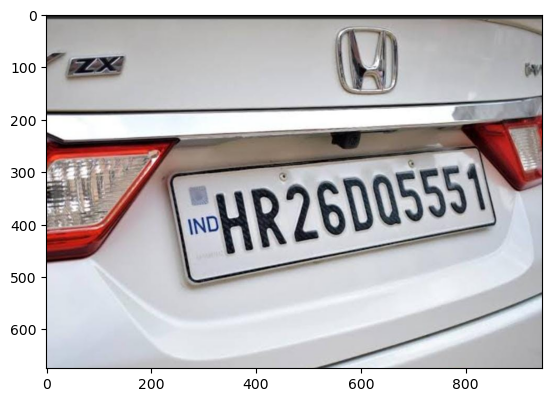

In [17]:
image_name='car13.jpg'# Read image
filename,extension=os.path.splitext(image_name)
image=cv2.imread("./car_images/" + image_name)                        
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

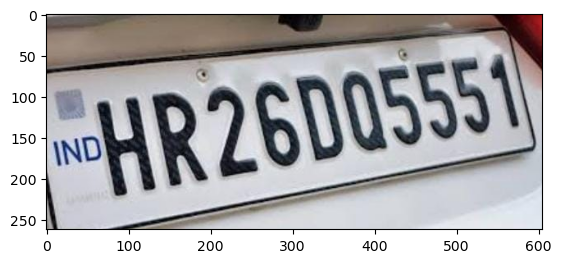

In [18]:
xmin, ymin, xmax, ymax =np.genfromtxt(f"./detections/{filename}.txt",delimiter="\n")
crop = image[int(ymin)-5:int(ymax)+5, int(xmin)-5:int(xmax)+5]
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
# function to display the coordinates of
# of the points clicked on the image
global Q
Q=[]
img=crop.copy()
def click_event(event, x, y, flags, params):

    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
        # displaying the coordinates
        # on the Shell
        Q.append([x,y])
        print(x, ' ', y)

        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)

    # checking for right mouse clicks	
    if event==cv2.EVENT_RBUTTONDOWN:
        Q.append([x,y])
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)

        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r),
                    (x,y), font, 1,
                    (255, 255, 0), 2)
        cv2.imshow('image', img)

    
def get_corner_points(img):
    
    # driver function
    # displaying the image
    cv2.imshow('image', img)

    # setting mouse handler for the image
    # and calling the click_event() function
    cv2.setMouseCallback('image', click_event)

    # wait for a key to be pressed to exit
    cv2.waitKey(0)

    # close the window
    cv2.destroyAllWindows()

def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")
    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    # return the ordered coordinates
    return rect

def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    # return the warped image
    return warped

def get_perspective(img):
    rows,cols,ch = img.shape

    pts = np.float32(Q)

    crop = four_point_transform(img, pts)
    # show the original and warped images
#     cv2.imshow("Original", img)
    cv2.imshow("Warped", crop)
    cv2.waitKey(0)
    return crop

### [BB and extraction](#Valid-Box)

Gray image


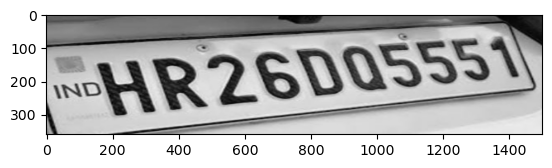

 Gaussian blur to smoothen image


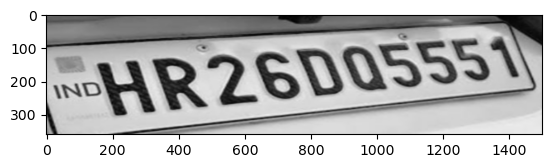

Otsu Threshold


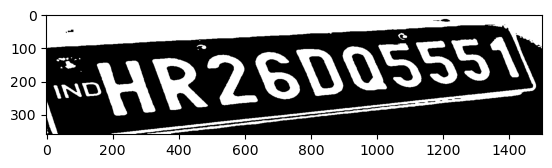

Dilated image


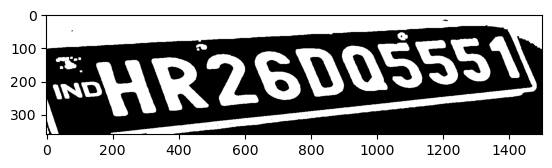

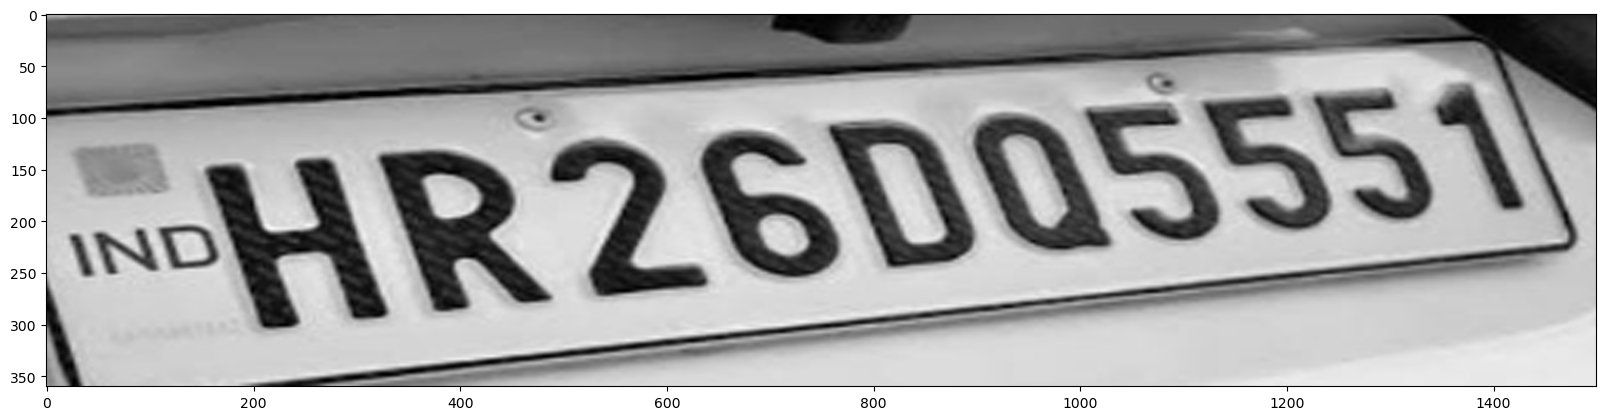

Want Perspective crop(y/n):y
56   103
81   225
588   138
562   43
Gray image


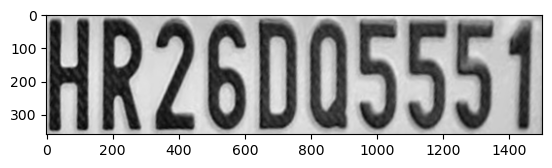

 Gaussian blur to smoothen image


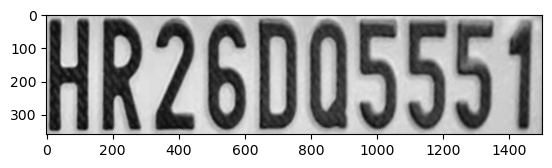

Otsu Threshold


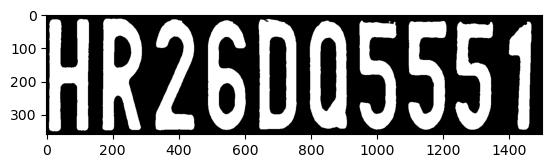

Dilated image


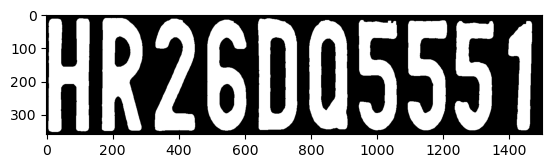

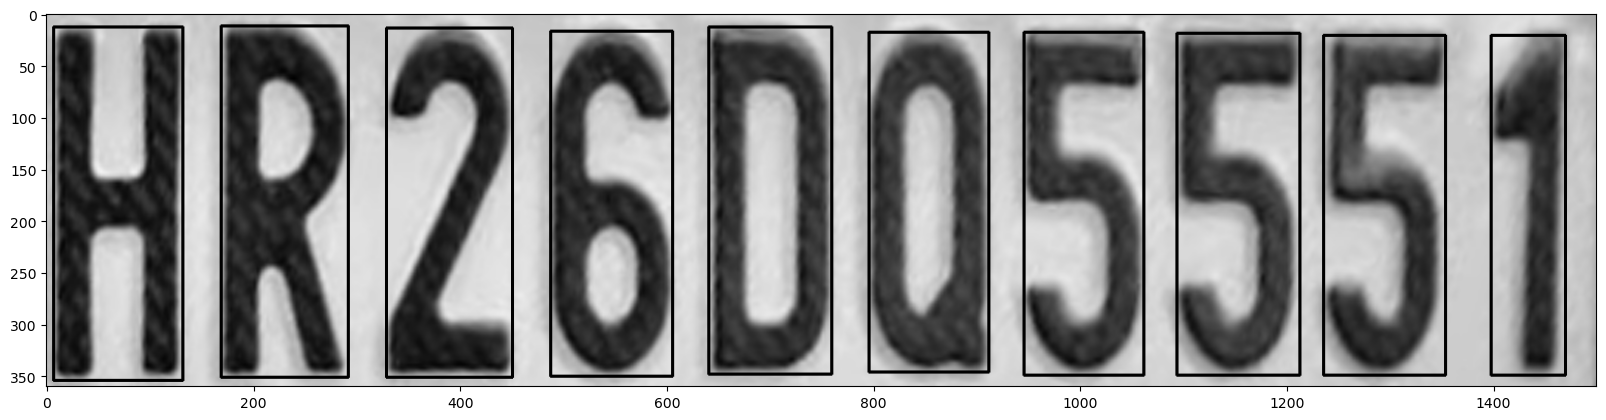

In [20]:
valid_char, extract_char, text=bounding_box(crop)
get_ans=input("Want Perspective crop(y/n):")
if get_ans=='y':
    get_corner_points(crop)
    crop=get_perspective(crop)
    valid_char, extract_char, text=bounding_box(crop)
else:
    pass

### [Predict Using Tesseract-OCR](#Single-model-for-digits-and-chars)

In [21]:
# print("Using Tesseract OCR model:",text)

### [Predict Using Simple NN Model](#Single-model-for-digits-and-chars)

In [22]:
# digit_predict=loaded_num_model.predict(valid_char)
digit_predict=num_model.predict(valid_char)
# print(digit_predict)
digit_predict_lable=[np.argmax(i) for i in digit_predict]

# ch_predict=loaded_ch_model.predict(valid_char)
ch_predict=ch_model.predict(valid_char)
ch_predict_lable=[np.argmax(i) for i in ch_predict]

name=[]
for i in ch_predict_lable:
    name+=ch_list[i]

if (len(name)==9):
    tmp=[name[:2],'-',digit_predict_lable[2:4],'-',name[4],'-', digit_predict_lable[5:]]
else:
    tmp=[name[:2],'-',digit_predict_lable[2:4],'-',name[4:6],'-', digit_predict_lable[6:]]

num_plate=""
for i in tmp:
    for j in i:
        num_plate+=str(j)

print("Using Simple NN model:",num_plate)

1/1 [==============================] - 0s 19ms/step
Using Simple NN model: HR-26-DO-5551


### Predict Using CNN Model

In [24]:
# digit_predict=loaded_num_model.predict(valid_char)
digit_predict=cnn_num_model.predict(np.expand_dims(valid_char, axis = 3))
digit_predict_lable=[np.argmax(i) for i in digit_predict]

# ch_predict=loaded_ch_model.predict(valid_char)
ch_predict=cnn_ch_model.predict(np.expand_dims(valid_char, axis = 3))
ch_predict_lable=[np.argmax(i) for i in ch_predict]

name=[]
for i in ch_predict_lable:
    name+=ch_list[i]

if (len(name)==9):
    tmp=[name[:2],'-',digit_predict_lable[2:4],'-',name[4],'-', digit_predict_lable[5:]]
else:
    tmp=[name[:2],'-',digit_predict_lable[2:4],'-',name[4:6],'-', digit_predict_lable[6:]]

num_plate=""
for i in tmp:
    for j in i:
        num_plate+=str(j)

print("Using Simple NN model:",num_plate)

1/1 [==============================] - 0s 22ms/step
Using Simple NN model: HR-26-DD-5551


### Detection Using KNN

In [25]:
digit_predict_lable=num_knn.predict(np.reshape(valid_char,(valid_char.shape[0],28*28)))

ch_predict_lable=ch_knn.predict(np.reshape(valid_char,(valid_char.shape[0],28*28)))

name=[]
for i in ch_predict_lable:
    name+=ch_list[i]

if (len(name)==9):
    tmp=[name[:2],'-',digit_predict_lable[2:4],'-',name[4],'-', digit_predict_lable[5:]]
else:
    tmp=[name[:2],'-',digit_predict_lable[2:4],'-',name[4:6],'-', digit_predict_lable[6:]]

num_plate=""
for i in tmp:
    for j in i:
        num_plate+=str(j)

print("Using KNN model:",num_plate)

Using KNN model: HR-26-DQ-5551


C:\Users\gujar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\gujar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

### [Go to main](#Main)

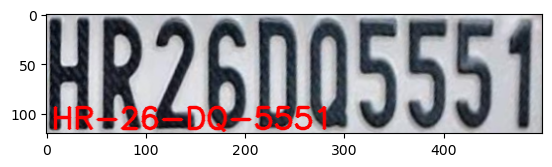

In [26]:
temp=crop.copy()
temp=cv2.resize(temp,(500,120))
text = num_plate
font = cv2.FONT_HERSHEY_SIMPLEX
# img=cv2.imread("./detections/detection1.png")
res = cv2.putText(temp, text=text, org=(5,temp.shape[0]-5), fontFace=font, fontScale=1, color=(0,0,255), thickness=2, lineType=cv2.LINE_AA)
# res = cv2.rectangle(img,(int(xmin), int(ymin)), (int(xmax), int(ymax)),color=(0,0,255),thickness=2)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))